# Basic Data Science in Python - Exercises 27/9 #

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

### Exercise 1: Supervised or unsupervised? If supervised, regression or classification?

1. Predict how much money a person is going to spend in a store, depending on their age, gender and income.

2. Group costumers by age

3. Target adds at different users depending on their search history

4. Recognize dog breeds from images

5. Decide if email is spam or not

### Exercise 2: Classify Wine (Handin)
Use a decision tree to classify wine: Train on the training data, and test your fit on the test data. Print the In Sample Score and Test Score.

Try to change the hyperparameters a bit around to get the best Test score.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

df = pd.DataFrame(X, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Exercise 3: Outlier detection with Isolation Forest
Look at the dataset from last tutorial below.

Use Isolation Forest to detect the outlier points. How does it compare with the outliers you found in the exercise last time? 

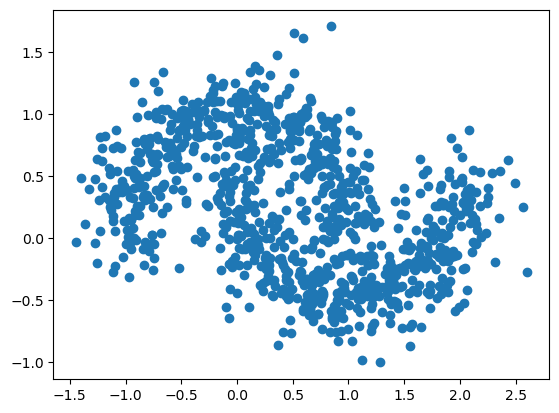

In [30]:
X, y = datasets.make_moons(n_samples=1000, noise=0.2, random_state=42)
for i in np.random.randint(0, 100, size=10):
    X[i] = X[i] * 1.5
plt.scatter(*X.T)

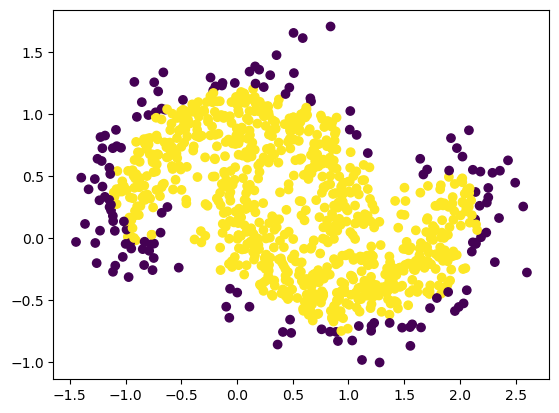

In [36]:
### YOUR CODE HERE

from sklearn.ensemble import IsolationForest

outliers = IsolationForest(n_estimators=100, contamination=0.15, max_samples=0.5).fit_predict(X)
plt.scatter(*X.T, c=outliers)

### Exercise 4: Bad Linear Regression
Perform linear regression on the below dataset. Is this a good idea? Can you explain why this fails?

Score: 0.1391321149208743


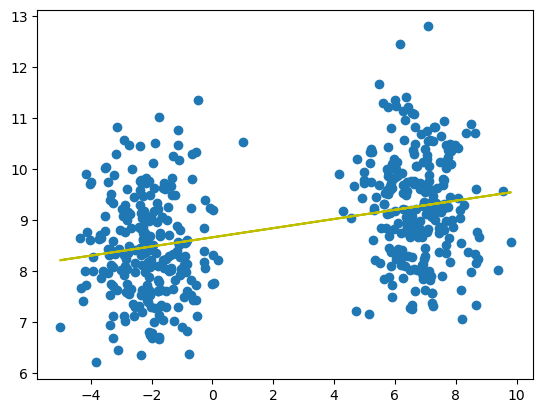

In [37]:
from sklearn.linear_model import LinearRegression

data,_ = datasets.make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=1)
X, y = data.T
plt.scatter(X, y)
X = X[:, None]
### YOUR CODE HERE
lr = LinearRegression().fit(X, y)
plt.plot(X, lr.predict(X), "y")
print("Score:", lr.score(X, y))

### Exercise 5: Recognizing Faces with SVM
We can use Support Vector Machines with a Radial basis function kernel to perform facial recognition. We will be using the Labeled Faces in the Wild dataset, of various public figures.

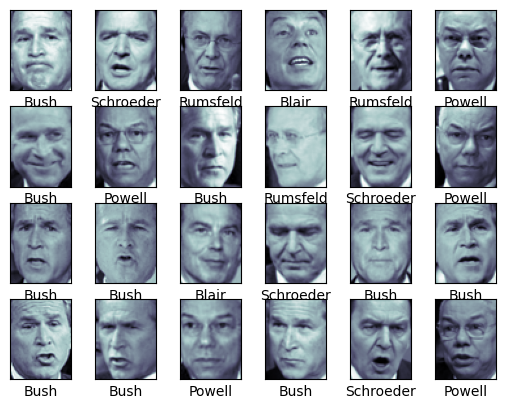

In [42]:
def plot_faces(faces, labels):
    fig, ax = plt.subplots(4, 6)
    for i, axis in enumerate(ax.flat):
        axis.imshow(faces.images[i], cmap="bone")
        axis.set(xticks=[], yticks=[], xlabel=faces.target_names[labels[i]].split()[-1])

faces = datasets.fetch_lfw_people(min_faces_per_person=100)
plot_faces(faces, faces.target)

Your job is to split the dataset into a training set and a testing set as we have done before. Then train a SVM model with RBF kernel, and predict on the test data. You may have to try out different values for $C$ and $gamma$.

Print the in-sample score as well as your test score of your model. You can see how many faces you mis-predicted marked in red in the below plot.

Sample score: 1.0
Test score: 0.6276803118908382


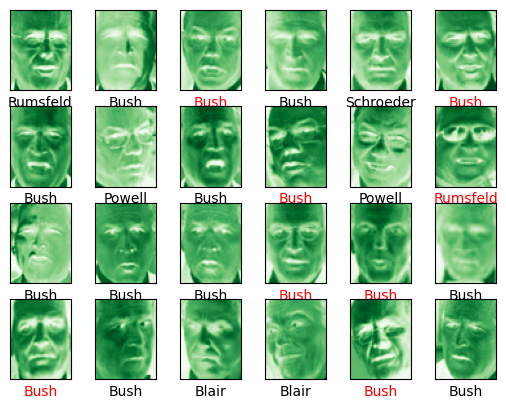

In [45]:
from sklearn.svm import SVC

prediction = None
#Split the dataset into training at test
### YOUR CODE HERE

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.9)

#Now, train an SVM and predict the faces. 

svm = SVC(C=10, kernel="rbf", class_weight="balanced").fit(X_train, y_train)
prediction = svm.predict(X_test)
print("Sample score:", svm.score(X_train, y_train))
print("Test score:", svm.score(X_test, y_test))
### YOUR CODE HERE

#Let's see the result!
fig, ax = plt.subplots(4, 6)
for i, axis in enumerate(ax.flat):
    axis.imshow(X_test[i].reshape(62, 47), cmap="bone")
    axis.set(xticks=[], yticks=[])
    axis.set_xlabel(faces.target_names[prediction[i]].split()[-1],
                   color="black" if prediction[i]==y_test[i] else "red")

### Exercise 6: Implement Linear Regression (Hard)
In this exercise we wish to implement linear regression. Note that for a dataset $X$, and labels $y$, we can find the normal vector of the hyperplane from the following equation $$w = (X^T X)^{-1}X^T y $$
On input vector $x$, we predict the label of $x$ by calculating $y = x^T w$.
For scoring, use least squared error: $$\frac{1}{n}\sum_{i=1}^n (x_i^T w - y_i)$$
Note: $X^T X$ may not be invertible, so use the pseudoinverse.

In [50]:
class LR():
    
    def __init__(self):
        self.w = None
    
    def fit(self, X, y):
        self.w = np.linalg.pinv(X.T @ X) @ X.T @ y
    
    def predict(self, X):
        return X @ self.w
    
    def score(self, X, y):
        return np.mean(self.predict(X) - y)**2

Test your implementation below by predicting housing prices.

Test score: 0.03827266215805267


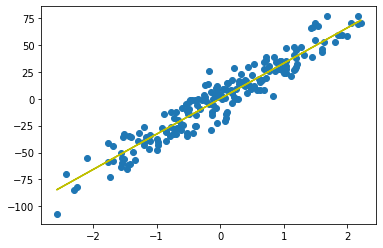

In [57]:
X, y = datasets.make_regression(n_samples=1000, n_features=1, noise=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LR()
lr.fit(X_train, y_train)
print("Test score:", lr.score(X_test, y_test))
plt.scatter(X_test.T[0], y_test)
plt.plot(X_test.T[0], lr.predict(X_test), "y")